In [670]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [672]:
test=pd.read_csv("H:\\data science\\Assessment 2\\ass__2\\test_lAUu6dG.csv")
test.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001015   Male     Yes          0      Graduate            No   
1  LP001022   Male     Yes          1      Graduate            No   
2  LP001031   Male     Yes          2      Graduate            No   
3  LP001035   Male     Yes          2      Graduate            No   
4  LP001051   Male      No          0  Not Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0             360.0   
1             3076               1500       126.0             360.0   
2             5000               1800       208.0             360.0   
3             2340               2546       100.0             360.0   
4             3276                  0        78.0             360.0   

   Credit_History Property_Area  
0             1.0         Urban  
1             1.0         Urban  
2             1.0         Urban  
3             NaN         Urban  
4             1.0         Urban

In [674]:
train=pd.read_csv("H:\\data science\\Assessment 2\\ass__2\\train_ctrUa4K.csv")
train.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [676]:
train.shape

(614, 13)

### i. Drop irrelevent columns in train

In [679]:
train.drop(columns=['Loan_ID'],inplace = True)
train.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
0   Male      No          0      Graduate            No             5849   
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

  Property_Area Loan_Status  
0         Urban           Y  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y

### ii. Find Total Number of columns

In [682]:
print("Number of rows in test:", test.shape[0])
print("Number of columns in test:", test.shape[1])
print("Number of rows in train:", test.shape[0])
print("Number of columns in train:", test.shape[1])

Number of rows in test: 367
Number of columns in test: 12
Number of rows in train: 367
Number of columns in train: 12


### iii. Check Duplicate columns

In [685]:
test.duplicated().sum()

0

In [687]:
train.duplicated().sum()

0

### iv. Summary of the dataframe

In [690]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [692]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


## Data Cleaning
### i. Detect and Handling of Missing value

In [695]:
# For the test_data
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [697]:
# dependents column of the dataset include number but the data_type is object. First we should replace the value '3+' to '3'.
test["Dependents"]=test["Dependents"].replace('3+', '3')
test["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [699]:
# replacing missing value with the appropriate one.
test['Gender']=test['Gender'].fillna((test['Gender'].mode()[0]))
test['Dependents']=test['Dependents'].fillna('0')
test['Self_Employed']=test['Self_Employed'].fillna((test['Self_Employed'].mode()[0]))
test['LoanAmount']=test['LoanAmount'].fillna((test['LoanAmount'].mean()))
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna((test['Loan_Amount_Term'].mode()[0]))
test['Credit_History']=test['Credit_History'].fillna(0)

In [701]:
test.isna().sum() # to check whether the missing values are filled

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [703]:
# For the train data
train.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [705]:
# dependents column of the dataset include number but the data_type is object. First we should replace the value '3+' to '3'.
train["Dependents"]=train["Dependents"].replace('3+', '3')
train["Dependents"].unique()

array(['0', '1', '2', '3', nan], dtype=object)

In [707]:
# replacing missing value with the appropriate one.
train['Gender']=train['Gender'].fillna((train['Gender'].mode()[0]))
train['Married']=train['Married'].fillna((train['Married'].mode()[0]))
train['Dependents']=train['Dependents'].fillna('0')
train['Self_Employed']=train['Self_Employed'].fillna((train['Self_Employed'].mode()[0]))
train['LoanAmount']=train['LoanAmount'].fillna((train['LoanAmount'].mean()))
train['Loan_Amount_Term']=train['Loan_Amount_Term'].fillna((train['Loan_Amount_Term'].mode()[0]))
train['Credit_History']=train['Credit_History'].fillna(0)

In [709]:
train.isna().sum() # to check whether the missing values are filled

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### ii. Detecting outliers

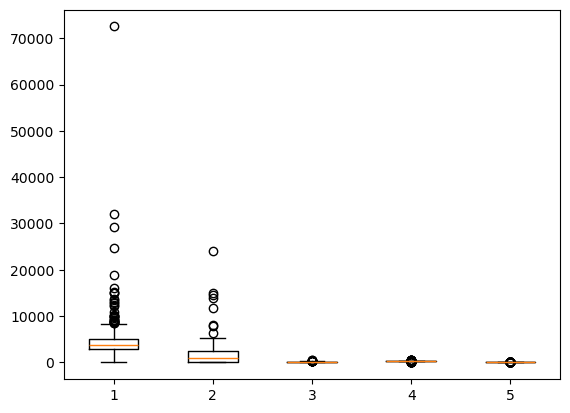

In [712]:
num_test=test.select_dtypes(include='number')
plt.boxplot(num_test)
plt.show()

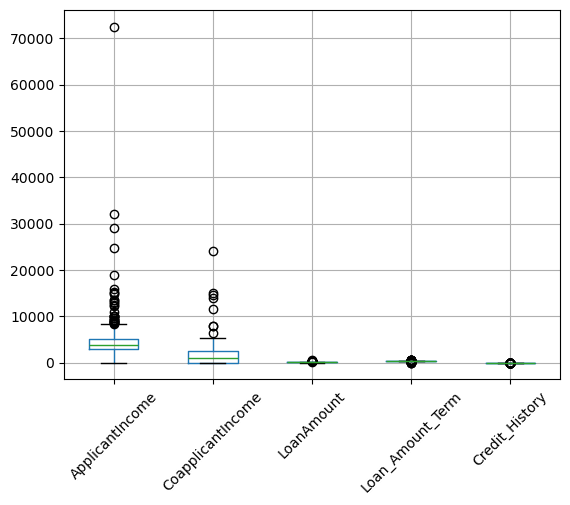

In [714]:
num_test.boxplot()
plt.xticks(rotation=45)
plt.show()

## 
Data Transformation

### i. Encoding Categorical Variable

In [718]:
# encoding categorical variable of Test data
test['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [720]:
label_encoder=preprocessing.LabelEncoder()
test['Gender']= label_encoder.fit_transform(test['Gender'])
test['Gender'].unique()

array([1, 0])

In [722]:
test['Married'].unique()

array(['Yes', 'No'], dtype=object)

In [724]:
test['Married']= label_encoder.fit_transform(test['Married'])
test['Married'].unique()

array([1, 0])

In [726]:
# dependents column of the dataset include number but the data_type is object. First we should replace the value '3+' to '3'.
test["Dependents"]=test["Dependents"].replace('3+', '3')
test["Dependents"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [728]:
test['Dependents']= label_encoder.fit_transform(test['Dependents'])
test['Dependents'].unique()

array([0, 1, 2, 3])

In [730]:
test['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [732]:
test['Education']= label_encoder.fit_transform(test['Education'])
test['Education'].unique()

array([0, 1])

In [734]:
test['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [736]:
test['Self_Employed']= label_encoder.fit_transform(test['Self_Employed'])
test['Self_Employed'].unique()

array([0, 1])

In [738]:
test['Loan_Amount_Term'].unique()

array([360., 240., 180.,  60., 480.,  84.,  12., 300., 350.,  36., 120.,
         6.])

In [740]:
test['Loan_Amount_Term']= label_encoder.fit_transform(test['Loan_Amount_Term'])
test['Loan_Amount_Term'].unique()

array([10,  7,  6,  3, 11,  4,  1,  8,  9,  2,  5,  0], dtype=int64)

In [742]:
test['Property_Area'].unique()

array(['Urban', 'Semiurban', 'Rural'], dtype=object)

In [744]:
test['Property_Area']= label_encoder.fit_transform(test['Property_Area'])
test['Property_Area'].unique()

array([2, 1, 0])

In [746]:
test.head(3)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0                10   
1             3076               1500       126.0                10   
2             5000               1800       208.0                10   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              2  
2             1.0              2

In [748]:
# Apply label encoding to multiple columns
test[['Gender', 'Married', 'Dependents', 'Education', 
      'Self_Employed', 'Property_Area', 'Loan_Amount_Term']] = test[
          ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
      ].apply(label_encoder.fit_transform)

# To check unique values for encoded columns
print(test[['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Amount_Term']])

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        1           0          0              0              2   
1         1        1           1          0              0              2   
2         1        1           2          0              0              2   
3         1        1           2          0              0              2   
4         1        0           0          1              0              2   
..      ...      ...         ...        ...            ...            ...   
362       1        1           3          1              1              2   
363       1        1           0          0              0              2   
364       1        0           0          0              0              1   
365       1        1           0          0              0              0   
366       1        0           0          0              1              0   

     Loan_Amount_Term  
0                  10  
1                  10  
2  

In [750]:
test.head(3)

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0  LP001015       1        1           0          0              0   
1  LP001022       1        1           1          0              0   
2  LP001031       1        1           2          0              0   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5720                  0       110.0                10   
1             3076               1500       126.0                10   
2             5000               1800       208.0                10   

   Credit_History  Property_Area  
0             1.0              2  
1             1.0              2  
2             1.0              2

In [752]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [754]:
# encoding categorical variable of Train data
train['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [756]:
train['Gender']= label_encoder.fit_transform(train['Gender'])
train['Gender'].unique()



array([1, 0])

In [758]:
train['Married'].unique()

array(['No', 'Yes'], dtype=object)

In [760]:
train['Married']= label_encoder.fit_transform(train['Married'])
train['Married'].unique()

array([0, 1])

In [762]:
train['Dependents'].unique()

array(['0', '1', '2', '3'], dtype=object)

In [764]:
# dependents column of the dataset include number but the data_type is object. First we should replace the value '3+' to '3'.
train["Dependents"]=train["Dependents"].replace('3+', '3')
train["Dependents"].unique()

array(['0', '1', '2', '3'], dtype=object)

In [766]:
train['Dependents']= label_encoder.fit_transform(train['Dependents'])
train['Dependents'].unique()

array([0, 1, 2, 3])

In [768]:
train['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [770]:
train['Education']= label_encoder.fit_transform(train['Education'])
train['Education'].unique()

array([0, 1])

In [772]:
train['Self_Employed'].unique()

array(['No', 'Yes'], dtype=object)

In [774]:
train['Self_Employed']= label_encoder.fit_transform(train['Self_Employed'])
train['Self_Employed'].unique()

array([0, 1])

In [776]:
train['Loan_Amount_Term'].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [778]:
train['Loan_Amount_Term']= label_encoder.fit_transform(train['Loan_Amount_Term'])
train['Loan_Amount_Term'].unique()

array([8, 4, 6, 5, 2, 7, 9, 1, 3, 0], dtype=int64)

In [780]:
train['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [782]:
train['Property_Area']= label_encoder.fit_transform(train['Property_Area'])
train['Property_Area'].unique()

array([2, 0, 1])

In [784]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int32  
 1   Married            614 non-null    int32  
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   Self_Employed      614 non-null    int32  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    int64  
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int32  
 11  Loan_Status        614 non-null    object 
dtypes: float64(3), int32(6), int64(2), object(1)
memory usage: 43.3+ KB


In [786]:
# Apply label encoding to multiple columns
train[['Gender', 'Married', 'Dependents', 'Education', 
      'Self_Employed', 'Property_Area', 'Loan_Amount_Term']] = train[
          ['Gender', 'Married', 'Dependents', 'Education', 
           'Self_Employed', 'Property_Area', 'Loan_Amount_Term']
      ].apply(label_encoder.fit_transform)

# To check unique values for encoded columns
print(train[['Gender', 'Married', 'Dependents', 'Education', 
            'Self_Employed', 'Property_Area', 'Loan_Amount_Term']])

     Gender  Married  Dependents  Education  Self_Employed  Property_Area  \
0         1        0           0          0              0              2   
1         1        1           1          0              0              0   
2         1        1           0          0              1              2   
3         1        1           0          1              0              2   
4         1        0           0          0              0              2   
..      ...      ...         ...        ...            ...            ...   
609       0        0           0          0              0              0   
610       1        1           3          0              0              0   
611       1        1           1          0              0              2   
612       1        1           2          0              0              2   
613       0        0           0          0              1              1   

     Loan_Amount_Term  
0                   8  
1                   8  
2  

## Outlier Handling

<Axes: xlabel='ApplicantIncome'>

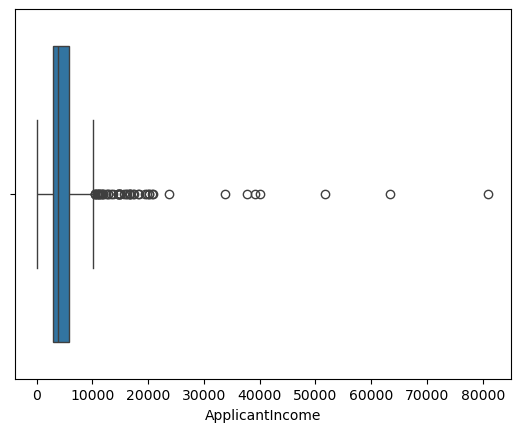

In [789]:
sns.boxplot(x=train["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome'>

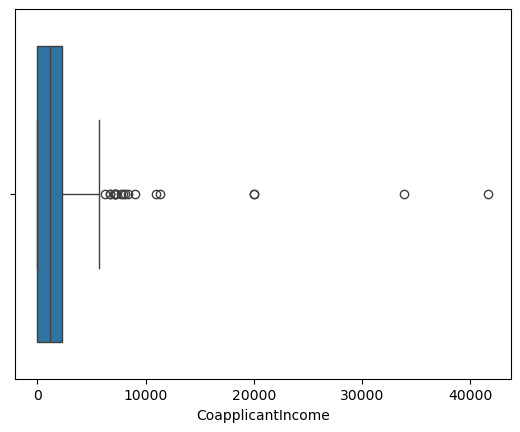

In [791]:
sns.boxplot(x=train["CoapplicantIncome"])

<Axes: xlabel='LoanAmount'>

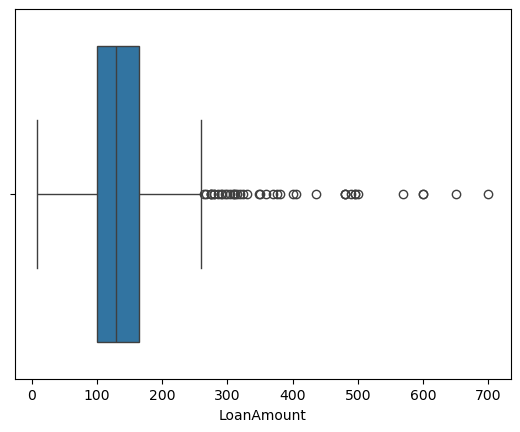

In [793]:
sns.boxplot(x=train["LoanAmount"])

## Exploratory Data Analysis

<Axes: xlabel='Loan_Status', ylabel='count'>

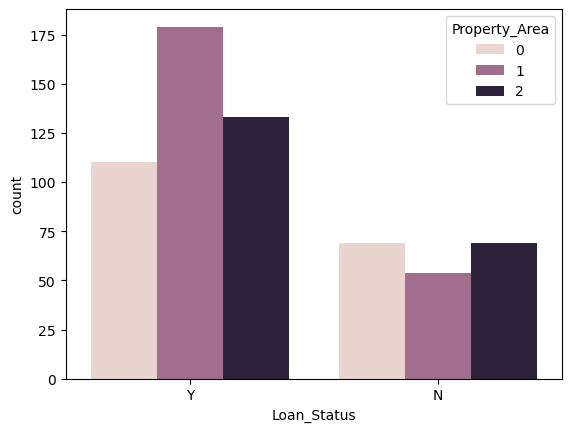

In [796]:
sns.countplot(data=train, x="Loan_Status",hue="Property_Area")
#people with SemiUrban has high acceptable chance of Loan Status

<Axes: xlabel='Loan_Status', ylabel='count'>

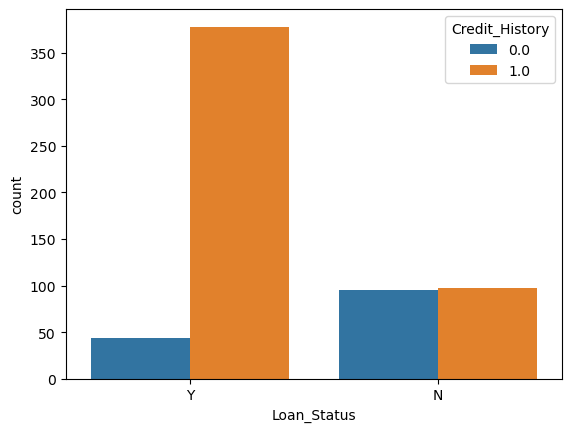

In [798]:
sns.countplot(data=train, x="Loan_Status",hue="Credit_History")
#people with accepatable past credit history are most likely accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

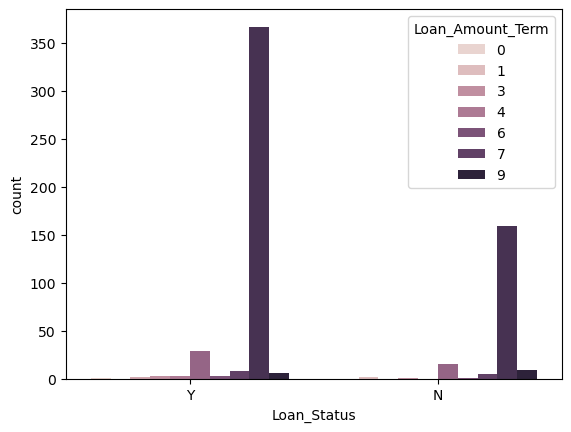

In [800]:
sns.countplot(data=train, x="Loan_Status",hue="Loan_Amount_Term")
#people with 360 month loan term are most likely to be acceptable

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

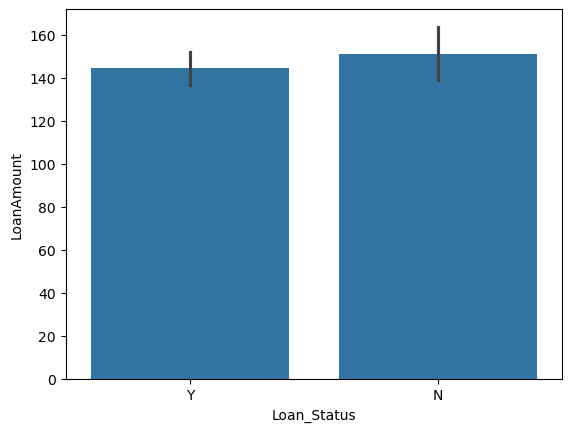

In [802]:
sns.barplot(data=train, x="Loan_Status",y="LoanAmount")

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

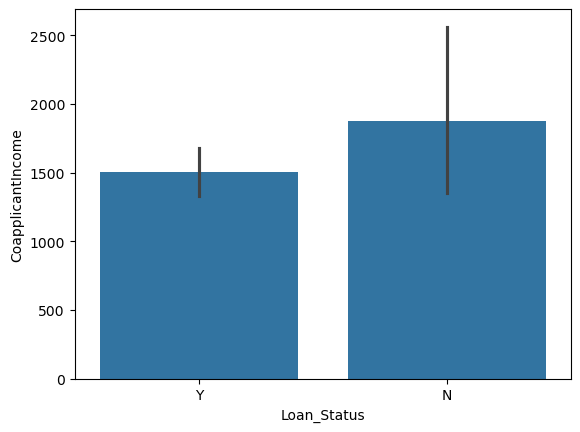

In [804]:
sns.barplot(data=train, x="Loan_Status",y="CoapplicantIncome")
# people with high coapplicant income are most not accepted to new loan

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

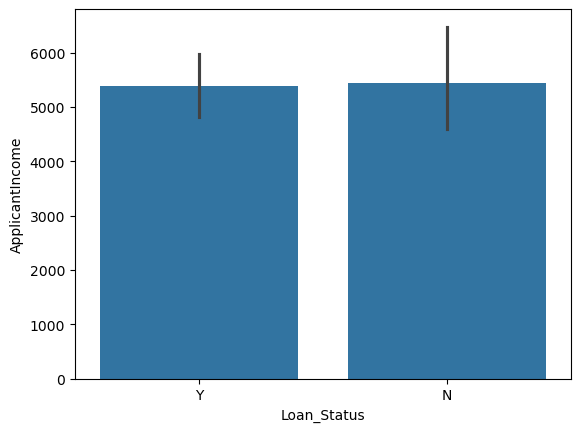

In [806]:
sns.barplot(data=train, x="Loan_Status",y="ApplicantIncome")

<Axes: xlabel='Loan_Status', ylabel='count'>

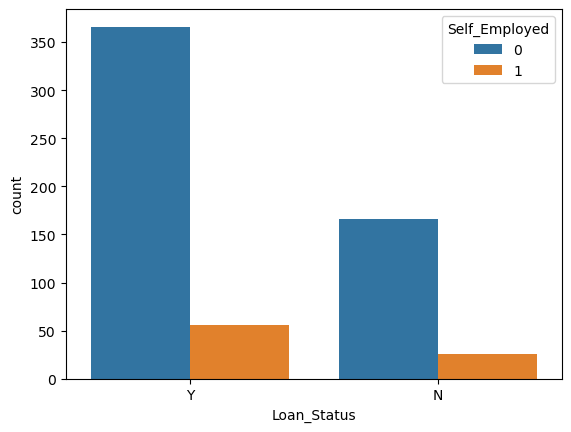

In [808]:
sns.countplot(data=train, x="Loan_Status",hue="Self_Employed")

<Axes: xlabel='Loan_Status', ylabel='count'>

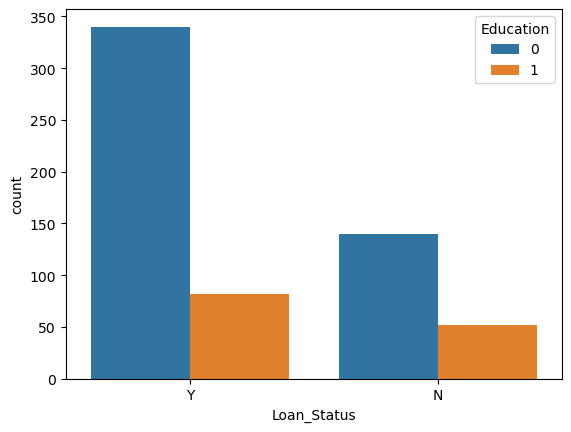

In [810]:
sns.countplot(data=train, x="Loan_Status",hue="Education")

<Axes: xlabel='Loan_Status', ylabel='count'>

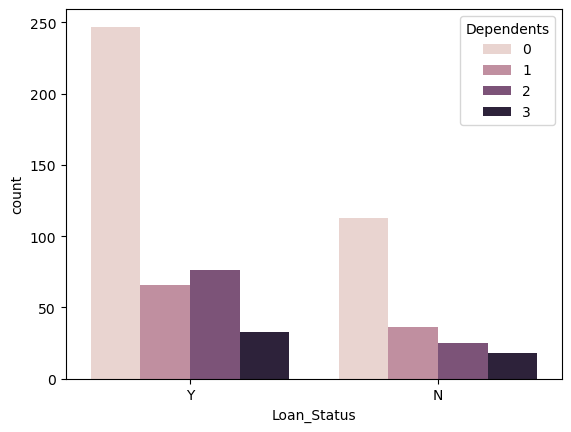

In [812]:
sns.countplot(data=train, x="Loan_Status",hue="Dependents")

<Axes: xlabel='Loan_Status', ylabel='count'>

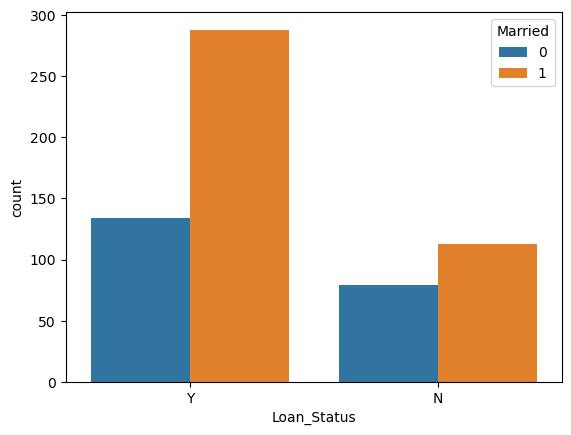

In [814]:
sns.countplot(data=train, x="Loan_Status",hue="Married")
#people who are married are ore acceptable to new loan

<Axes: xlabel='Loan_Status', ylabel='count'>

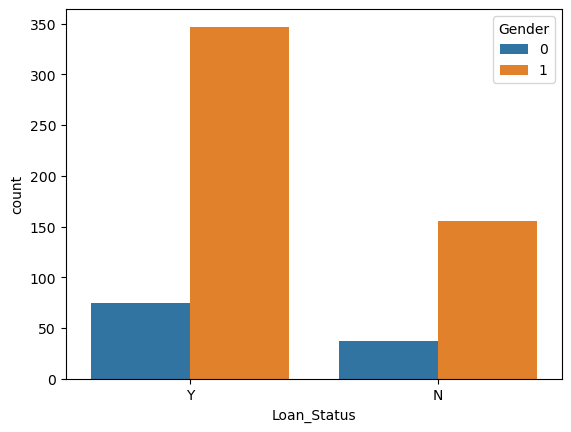

In [816]:
sns.countplot(data=train, x="Loan_Status",hue="Gender")

## standard Scaling

In [819]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [821]:
# Create a StandardScaler object
std_scale = StandardScaler()

# Fit the scaler on the training data
std_scale.fit(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

# Transform both the training and test data using the fitted scaler
train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(train[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])
test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']] = std_scale.transform(test[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']])

In [823]:
test

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0          0              0   
366  LP002989       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.051857          -0.554487   -0.433638          2.104308   
1          -0.381297          -0.041468   -0.243092          2.104308   
2          -0.066097           0.061136    0.733459          2.104308   
3          -0.501872           0.316278   -0.552730          2.104308   
4          -0.348532          -0.554487   -0.814731          2.104308   
..               ...                ...         ...               ...   
362        -0.228448           0.053270   -0.397911          2.104308   
363        -0.204038          -0.312000   -0.374092          2.104308   
364        -0.352791           0.127145   -0.243092          2.104308   
365        -0.066097           0.263950    0.138001          2.104308   
366         0.621969          -0.554487   -0.576548         -1.504757   

     Credit_History  Property_Area  
0               1.0              2  
1               1.0              2  
2               1.0              2  
3               0.0              2  
4               1.0              2  
..              ...            ...  
362             1.0              2  
363             1.0              2  
364             0.0              1  
365             1.0              0  
366             1.0              0  

[367 rows x 12 columns]

In [825]:
train

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0         0.072991   
1         1        1           1          0              0        -0.134412   
2         1        1           0          0              1        -0.393747   
3         1        1           0          1              0        -0.462062   
4         1        0           0          0              0         0.097728   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0        -0.410130   
610       1        1           3          0              0        -0.212557   
611       1        1           1          0              0         0.437174   
612       1        1           2          0              0         0.357064   
613       0        0           0          0              1        -0.134412   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0            -0.554487    0.000000          0.299776             1.0   
1            -0.038732   -0.219273          0.299776             1.0   
2            -0.554487   -0.957641          0.299776             1.0   
3             0.251980   -0.314547          0.299776             1.0   
4            -0.554487   -0.064454          0.299776             1.0   
..                 ...         ...               ...             ...   
609          -0.554487   -0.898095          0.299776             1.0   
610          -0.554487   -1.267279         -2.407023             1.0   
611          -0.472404    1.269371          0.299776             1.0   
612          -0.554487    0.483367          0.299776             1.0   
613          -0.554487   -0.159728          0.299776             0.0   

     Property_Area Loan_Status  
0                2           Y  
1                0           N  
2                2           Y  
3                2           Y  
4                2           Y  
..             ...         ...  
609              0           Y  
610              0           Y  
611              2           Y  
612              2           Y  
613              1           N  

[614 rows x 12 columns]

## Machine Learning Model Building

In [828]:
X = train.drop('Loan_Status',axis=1)
y = train['Loan_Status']

## Random Forest

In [831]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

In [837]:
if 'Loan_Status' in test.columns:
    test = test.drop(['Loan_Status'], axis=1)
test

Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0    LP001015       1        1           0          0              0   
1    LP001022       1        1           1          0              0   
2    LP001031       1        1           2          0              0   
3    LP001035       1        1           2          0              0   
4    LP001051       1        0           0          1              0   
..        ...     ...      ...         ...        ...            ...   
362  LP002971       1        1           3          1              1   
363  LP002975       1        1           0          0              0   
364  LP002980       1        0           0          0              0   
365  LP002986       1        1           0          0              0   
366  LP002989       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0           0.051857          -0.554487   -0.433638          2.104308   
1          -0.381297          -0.041468   -0.243092          2.104308   
2          -0.066097           0.061136    0.733459          2.104308   
3          -0.501872           0.316278   -0.552730          2.104308   
4          -0.348532          -0.554487   -0.814731          2.104308   
..               ...                ...         ...               ...   
362        -0.228448           0.053270   -0.397911          2.104308   
363        -0.204038          -0.312000   -0.374092          2.104308   
364        -0.352791           0.127145   -0.243092          2.104308   
365        -0.066097           0.263950    0.138001          2.104308   
366         0.621969          -0.554487   -0.576548         -1.504757   

     Credit_History  Property_Area  
0               1.0              2  
1               1.0              2  
2               1.0              2  
3               0.0              2  
4               1.0              2  
..              ...            ...  
362             1.0              2  
363             1.0              2  
364             0.0              1  
365             1.0              0  
366             1.0              0  

[367 rows x 12 columns]

In [839]:
rfc.fit(X, y)

# Make predictions on the test data
y_pred_rfc = rfc.predict(test.drop(['Loan_ID'],axis=1))

## tO SAVE THE FILE AS CSV

In [842]:
test['Loan_Status']=y_pred_rfc
test[['Loan_ID','Loan_Status']].to_csv('loan_Prediction_analysis.csv',index=False)

In [844]:
import os
print(os.getcwd())

C:\Users\NAYANA\practice\Exam_1
